벡터의 유사도(Vector Similarity)
---
* 문서의 유서도를 구하는 일은 자연어 처리의 주요 주제 중 하나이다.
* 주로 문서들 간에 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되어있는지에 의존한다.
* 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지, 문서 간의 단어들의 차이를 어떤 방법으로 계산했는지에 달려있다.

1. 코사인 유사도 (Cosine Similarity)
    - 코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미
    - 같은 방향이면 1, 서로 반대 방향은 -1, 직교하면 0을 가진다. 범위는 -1 ~ 1을 가지고 1에 가까울수록 유사도가 높다고 판단한다.
    - 두 벡터 A,B에 대한 코사인 유도식을 다음과 같이 표현 할 수 있다.
    - 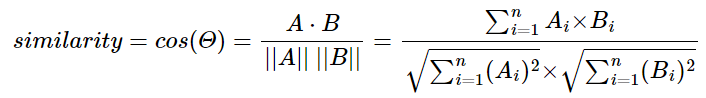
    - 코사인 유사도를 구하는 방법은 여러가지가 있는데 Numpy를 이용해서 계산해본다.

In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B)) #코사인 계산하는 함수

In [2]:
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

In [3]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


* 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것이다.
* 앞에서 두 벡터의 방향이 동일하면 1이 나오고, 유사도의 관점에서는 유사도의 값이 최대를 의미한다고 했다
* 문서3은 문서2에서 단지 모든 단어의 빈도수를 1씩 증가했을 뿐이다. 한 문서내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것!
* 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와준다.
* 코사인 유사도는 유사도를 구할 때, 벡터의 크기가 아니라 벡터의 방향(패턴)에 초점을 두기 때문입니다. 코사인 유사도가 벡터의 유사도를 구하는 또 다른 방법인 내적과 가지는 차이점이다.

2. 유사도를 이용한 추천 시스템 구현하기
* 캐글에서 사용되었던 영화 데이터셋을 가지고 영화 추천시스템을 만들어보겠다. TF-IDF와 코사인 유사도만으로 영화의 줄거리에 기반하여 영화를 추천하는 시스템을 만들 수 있다.
* https://www.kaggle.com/rounakbanik/the-movies-dataset 
* 총 24개의 열을 가진 45466개의 샘플로 구성된 영화 정보 데이터

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [6]:
data = data.head(20000)

In [7]:
#Null값 확인
data['overview'].isnull().sum()

135

In [8]:
# overview에서 Null 값을 가진 경우에는 Null 값을 제거
data['overview'] = data['overview'].fillna('')

In [9]:
tfidf = TfidfVectorizer(stop_words='english')
# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix.shape)

(20000, 47487)


In [10]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [12]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


In [13]:
idx = indices['Father of the Bride Part II']
print(idx)

4


In [14]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    return data['title'].iloc[movie_indices]

In [15]:
get_recommendations('The Dark Knight Rises')
# 가장 유사한 영화를 출력하는데 다크나이트가 첫번째고 그외에도 전부 배트맨 영화인것을 볼 수 있다.

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object